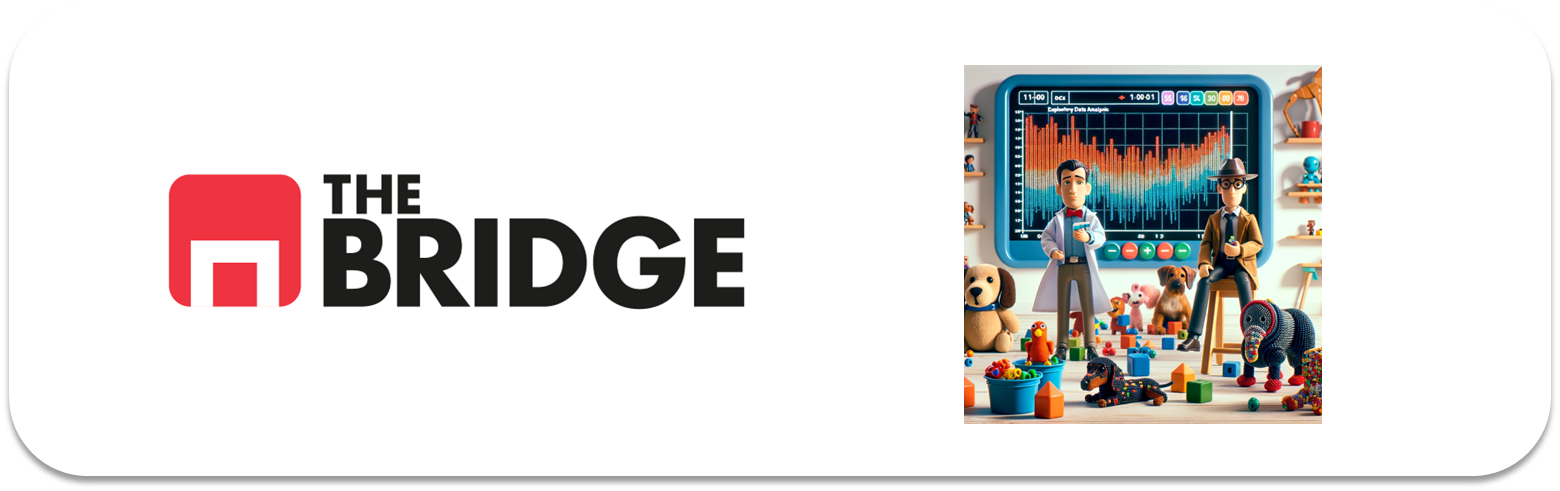

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms, bubble_plot, grafico_dispersion_con_correlacion


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [17]:
df_titanic= pd.read_csv("./data/titanic.csv")
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [18]:

df_titanic_cleaned = df_titanic.drop(["deck", "survived", "pclass", "embarked"], axis = 1)
df_titanic_cleaned.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [19]:
df_titanic_cleaned["family_members"] = df_titanic_cleaned["parch"] + df_titanic["sibsp"]

In [20]:
df_titanic_cleaned = df_titanic_cleaned.drop(columns=["parch", "sibsp"])

In [21]:
df_titanic_cleaned.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [24]:

mode_embark_town = df_titanic_cleaned["embark_town"].mode()[0]  


In [28]:

df_titanic_cleaned["embark_town"] = df_titanic_cleaned["embark_town"].fillna(mode_embark_town)

In [29]:
df_titanic_cleaned

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [31]:


df_titanic_cleaned["age"] = df_titanic_cleaned.groupby("who")["age"].transform(lambda group: group.fillna(group.mean()))


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [40]:
import scipy.stats as stats


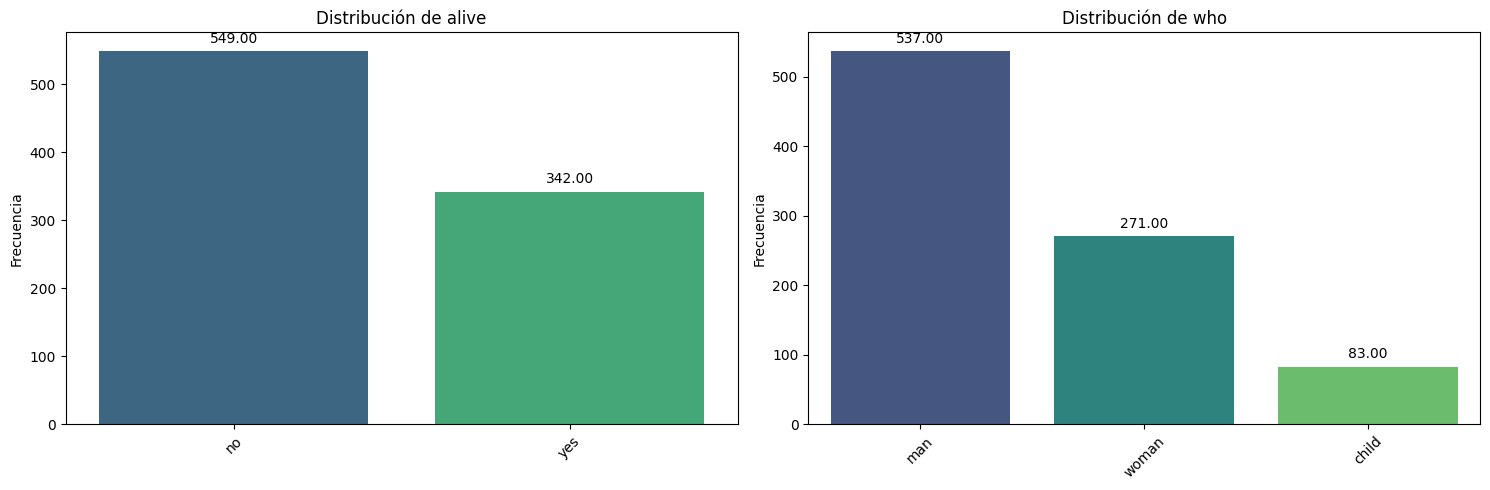

In [44]:
pinta_distribucion_categoricas(df_titanic_cleaned,["alive","who"], relativa= False, mostrar_valores= True)

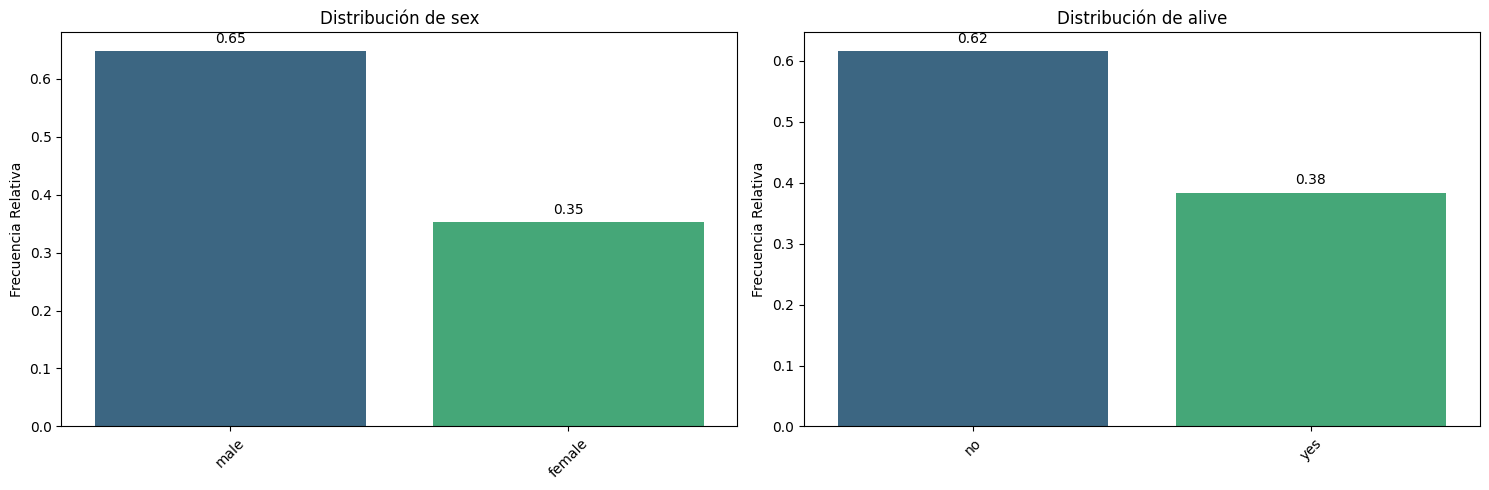

In [63]:
# Visualización de la relación entre sexo y supervivencia
pinta_distribucion_categoricas(df_titanic_cleaned,["sex", "alive"], relativa=True, mostrar_valores=True)
 

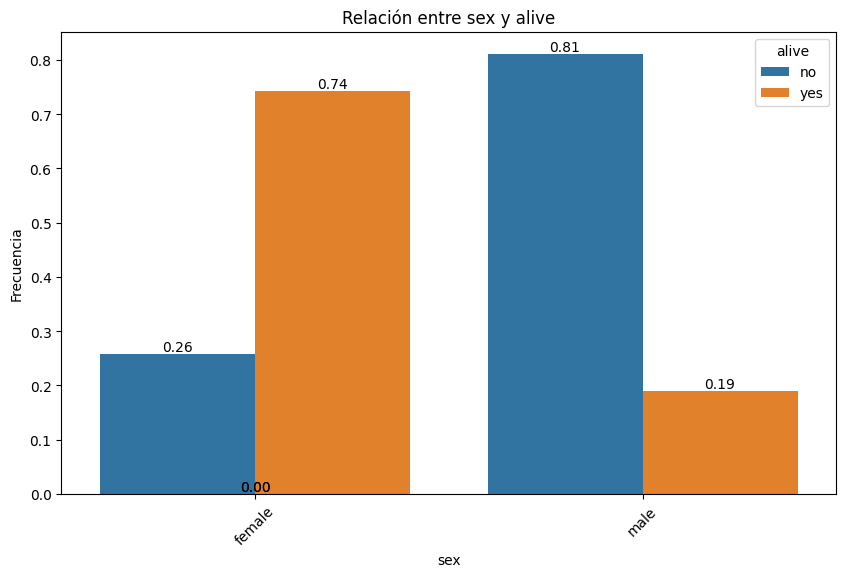

In [62]:
plot_categorical_relationship_fin(df_titanic_cleaned, "sex","alive", relative_freq = True, show_values = True)

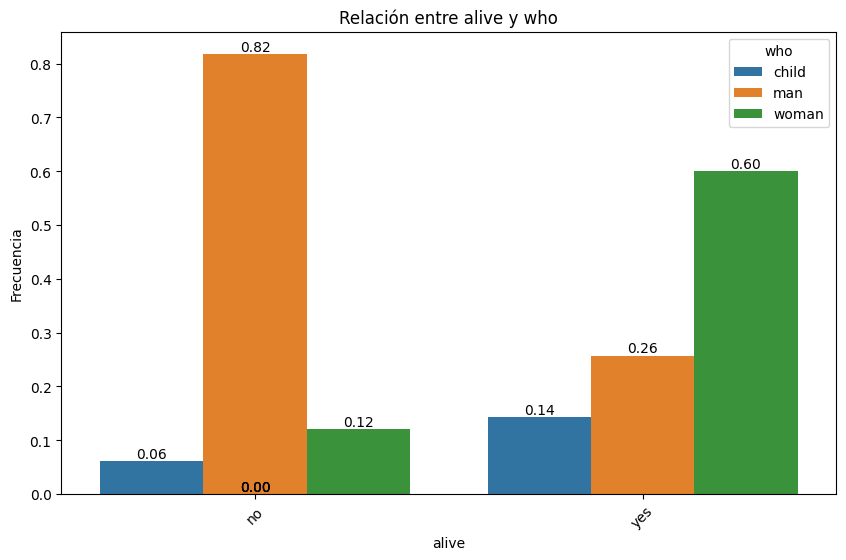

In [60]:
plot_categorical_relationship_fin(df_titanic_cleaned, "alive","who", relative_freq = True, show_values = True)

In [64]:
# Relación entre sexo y supervivencia
contingency_sex = pd.crosstab(df_titanic_cleaned["sex"], df_titanic_cleaned["alive"])
chi2_sex, p_sex, _, _ = stats.chi2_contingency(contingency_sex)

# Relación entre ser adulto o niño y supervivencia
contingency_who = pd.crosstab(df_titanic_cleaned["who"], df_titanic_cleaned["alive"])
chi2_who, p_who, _, _ = stats.chi2_contingency(contingency_who)


{
    "Relación Sexo-Supervivencia": {"Chi2": chi2_sex, "p-valor": p_sex},
    "Relación Adulto/Niño-Supervivencia": {"Chi2": chi2_who, "p-valor": p_who}
}

{'Relación Sexo-Supervivencia': {'Chi2': np.float64(260.71702016732104),
  'p-valor': np.float64(1.197357062775565e-58)},
 'Relación Adulto/Niño-Supervivencia': {'Chi2': np.float64(283.923050324233),
  'p-valor': np.float64(2.2227620817798914e-62)}}

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

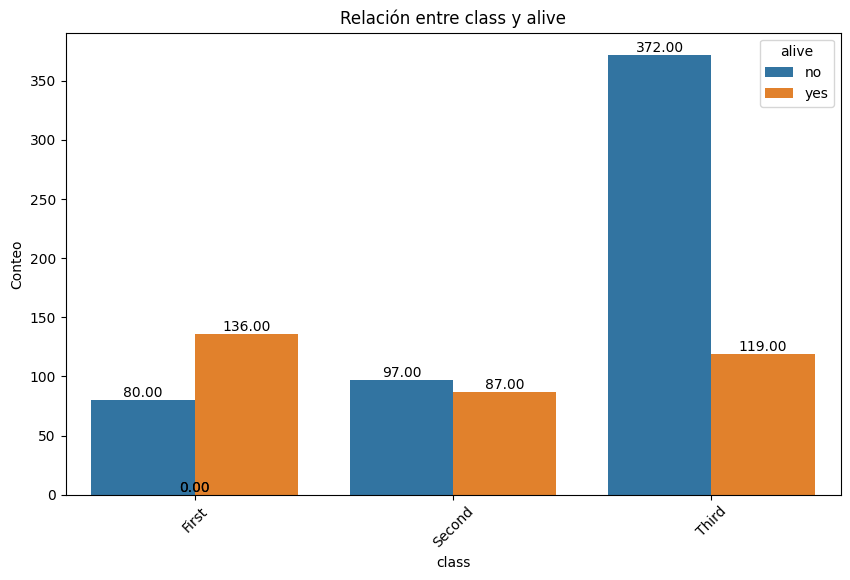

In [66]:
# Visualización de la relación entre clase y supervivencia
plot_categorical_relationship_fin(df_titanic_cleaned, "class","alive", relative_freq = False, show_values = True)


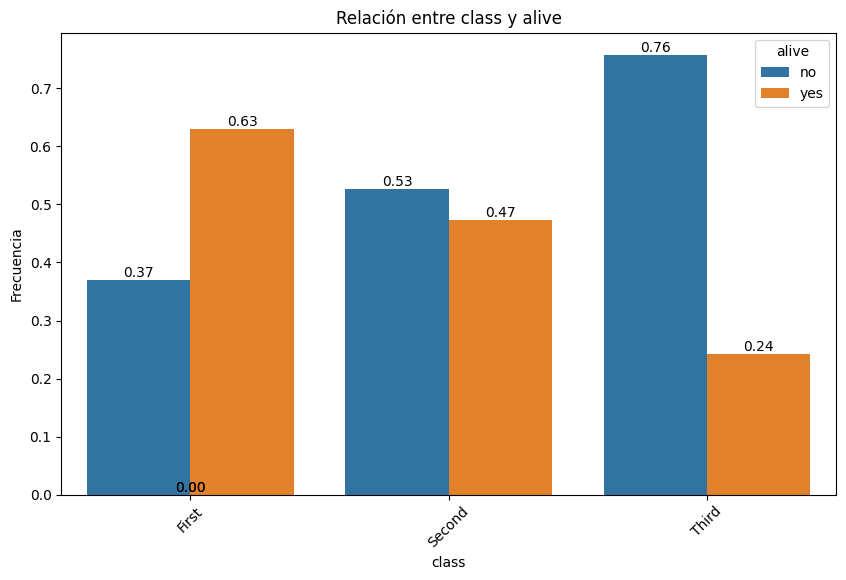

In [67]:
plot_categorical_relationship_fin(df_titanic_cleaned, "class","alive", relative_freq = True, show_values = True)

In [69]:
contingency_class = pd.crosstab(df_titanic_cleaned["class"], df_titanic_cleaned["alive"])
chi2_class, p_class, _, _ = stats.chi2_contingency(contingency_class)


print({
    "Relación Clase-Supervivencia": {"Chi2": chi2_class, "p-valor": p_class}
})

{'Relación Clase-Supervivencia': {'Chi2': np.float64(102.88898875696056), 'p-valor': np.float64(4.549251711298793e-23)}}


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

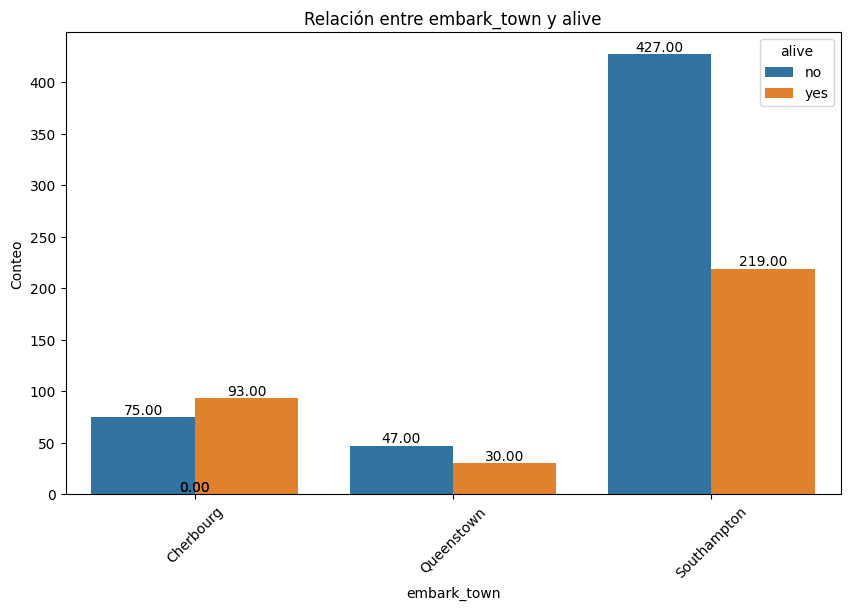

In [70]:
plot_categorical_relationship_fin(df_titanic_cleaned, "embark_town","alive", relative_freq = False, show_values = True)




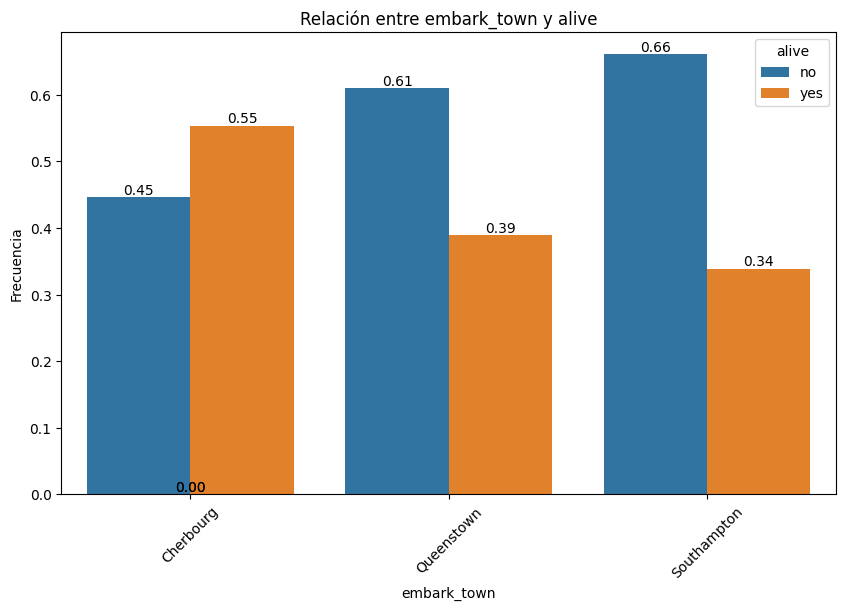

In [71]:
plot_categorical_relationship_fin(df_titanic_cleaned, "embark_town","alive", relative_freq = True, show_values = True)

In [73]:
contingency_embark = pd.crosstab(df_titanic_cleaned["embark_town"], df_titanic_cleaned["alive"])
chi2_embark, p_embark, _, _ = stats.chi2_contingency(contingency_embark)

print({
    "Relación Ciudad de Embarque-Supervivencia": {"Chi2": chi2_embark, "p-valor": p_embark}
})

{'Relación Ciudad de Embarque-Supervivencia': {'Chi2': np.float64(25.964452881874784), 'p-valor': np.float64(2.3008626481449577e-06)}}


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

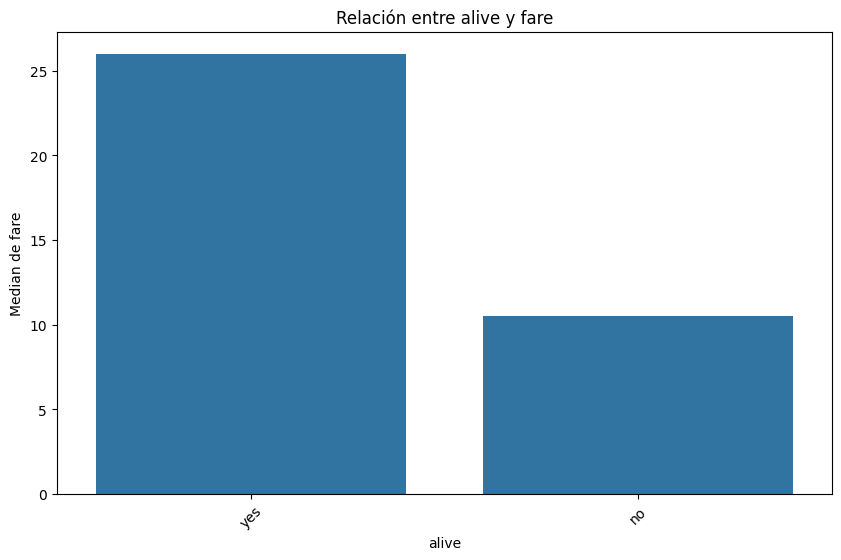

In [97]:
plot_categorical_numerical_relationship(df_titanic_cleaned, "alive", "fare", measure = "median")

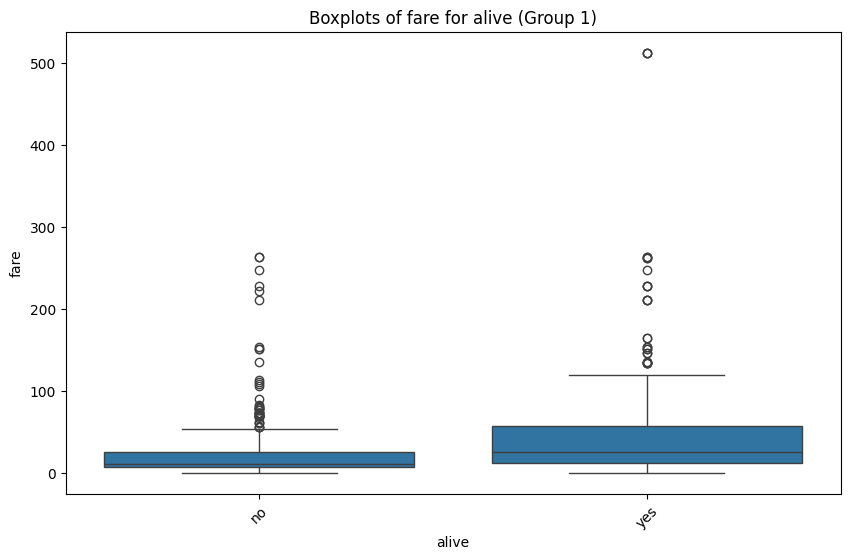

In [77]:
plot_grouped_boxplots(df_titanic_cleaned, "alive", "fare")



In [83]:
from scipy.stats import ttest_ind  

# Filtrar datos de sobrevivientes y no sobrevivientes
fare_survived = df_titanic_cleaned[df_titanic_cleaned["alive"] == "yes"]["fare"].dropna()
fare_not_survived = df_titanic_cleaned[df_titanic_cleaned["alive"] == "no"]["fare"].dropna()

# Realizar el test t de Student
t_stat, p_val = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

# Mostrar los resultados del test
print({
    "t-statistic": t_stat,
    "p-value": p_val
})

{'t-statistic': np.float64(6.839099259085254), 'p-value': np.float64(2.6993323503141236e-11)}


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


In [89]:
passengers_no_fare = df_titanic_cleaned[df_titanic_cleaned["fare"] == 0]


highest_fare = df_titanic_cleaned["fare"].max()
passenger_highest_fare = df_titanic_cleaned[df_titanic_cleaned["fare"] == highest_fare]

passengers_no_fare_info = passengers_no_fare[["sex", "age", "class", "embark_town", "alive"]]
highest_fare_info = passenger_highest_fare[["sex", "age", "class", "embark_town", "alive", "fare"]]

passengers_no_fare_info, highest_fare_info

(      sex        age   class  embark_town alive
 179  male  36.000000   Third  Southampton    no
 263  male  40.000000   First  Southampton    no
 271  male  25.000000   Third  Southampton   yes
 277  male  33.173123  Second  Southampton    no
 302  male  19.000000   Third  Southampton    no
 413  male  33.173123  Second  Southampton    no
 466  male  33.173123  Second  Southampton    no
 481  male  33.173123  Second  Southampton    no
 597  male  49.000000   Third  Southampton    no
 633  male  33.173123   First  Southampton    no
 674  male  33.173123  Second  Southampton    no
 732  male  33.173123  Second  Southampton    no
 806  male  39.000000   First  Southampton    no
 815  male  33.173123   First  Southampton    no
 822  male  38.000000   First  Southampton    no,
         sex   age  class embark_town alive      fare
 258  female  35.0  First   Cherbourg   yes  512.3292
 679    male  36.0  First   Cherbourg   yes  512.3292
 737    male  35.0  First   Cherbourg   yes  512.3292

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

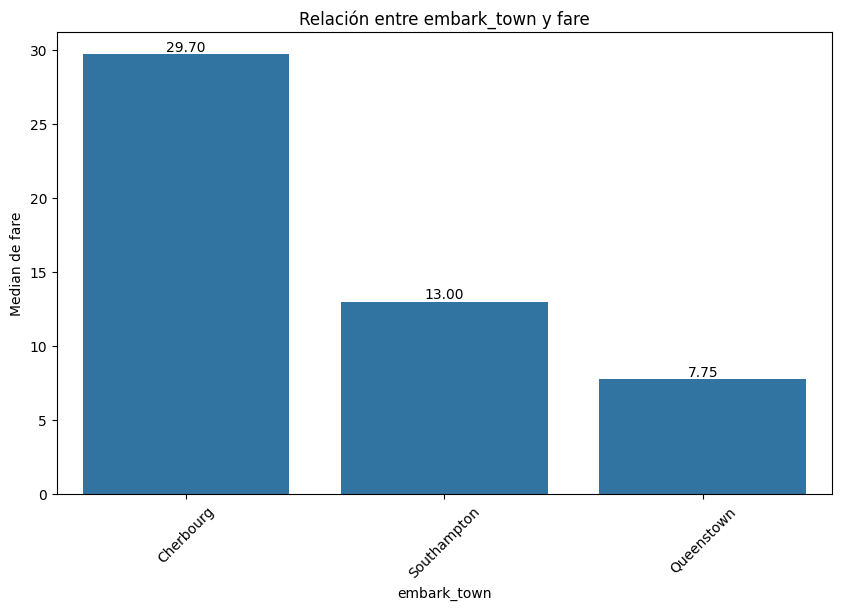

In [96]:
plot_categorical_numerical_relationship(df_titanic_cleaned, "embark_town", "fare", "alive", measure = "median")

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

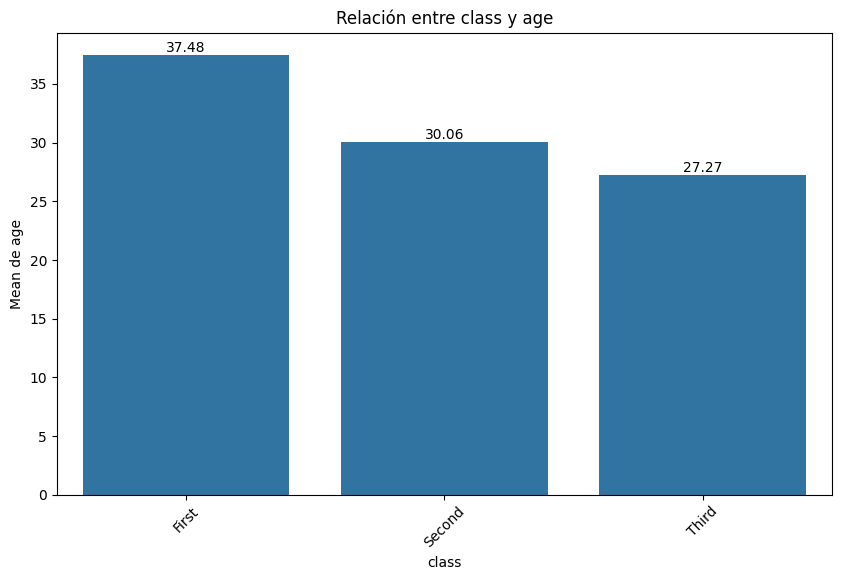

In [99]:

plot_categorical_numerical_relationship(df_titanic_cleaned, "class", "age", "alive")

In [102]:
grouped_data = df_titanic_cleaned.groupby(["class", "alive"])["age"].agg(["count", "median", "mean"]).reset_index()

total_by_class = df_titanic_cleaned.groupby("class")["alive"].count()
grouped_data["relative"] = grouped_data["count"] / grouped_data["count"].sum() * 100
grouped_data

,class,alive,count,median,mean,relative
0,First,no,80,38.500000,41.590875,8.978676
1,First,yes,136,33.586562,35.064600,15.263749
2,Second,no,97,32.000000,33.517648,10.886644
3,Second,yes,87,28.000000,26.208922,9.764310
4,Third,no,372,31.000000,28.316440,41.750842
5,Third,yes,119,27.000000,23.978808,13.355780


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [123]:
df_titanic_cleaned["alive_numeric"] = df_titanic_cleaned["alive"].apply(lambda x: 1 if x == "yes" else 0)


df_titanic_cleaned[["alive", "alive_numeric"]].head()

,alive,alive_numeric
0,no,0
1,yes,1
2,yes,1
3,yes,1
4,no,0


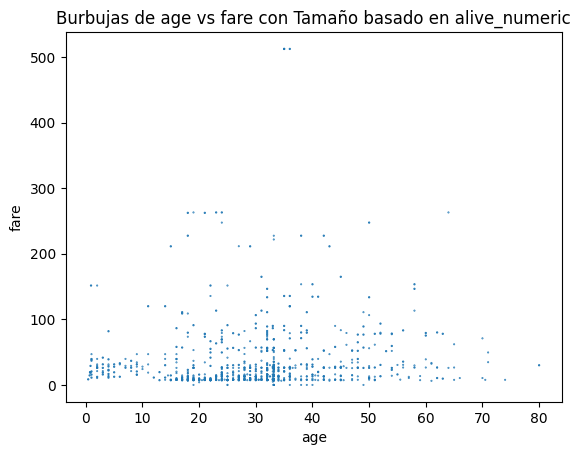

In [129]:
bubble_plot(df_titanic_cleaned, "age", "fare", "alive_numeric", scale=5)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [139]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes.head(10)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23


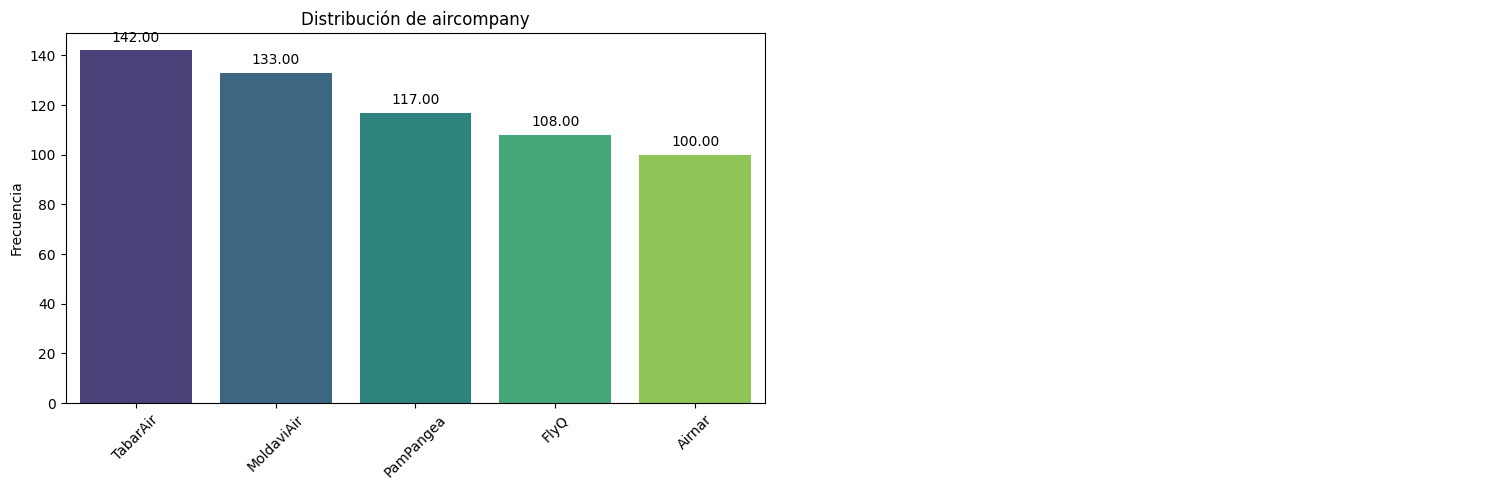

In [145]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= False, mostrar_valores= True)

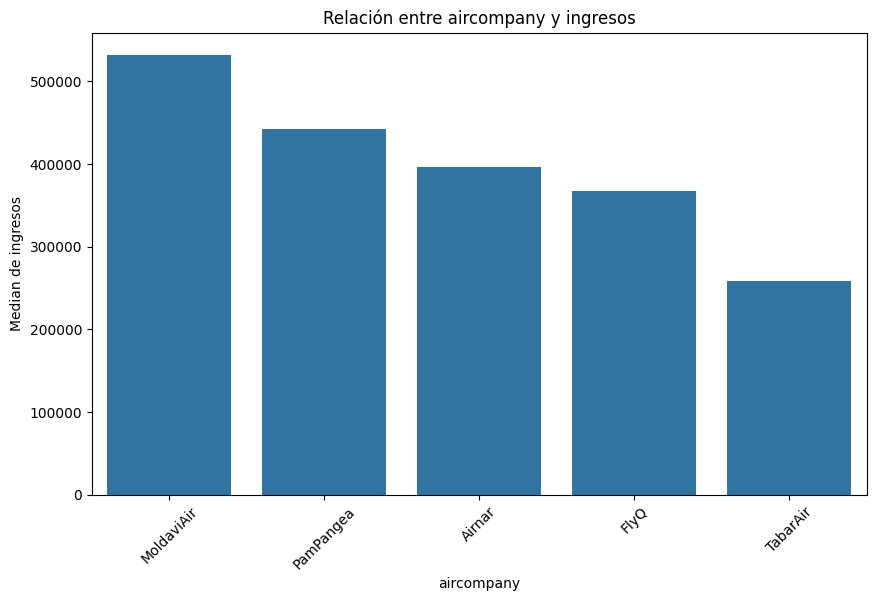

In [147]:
plot_categorical_numerical_relationship(df_viajes, "aircompany","ingresos",measure="median")

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


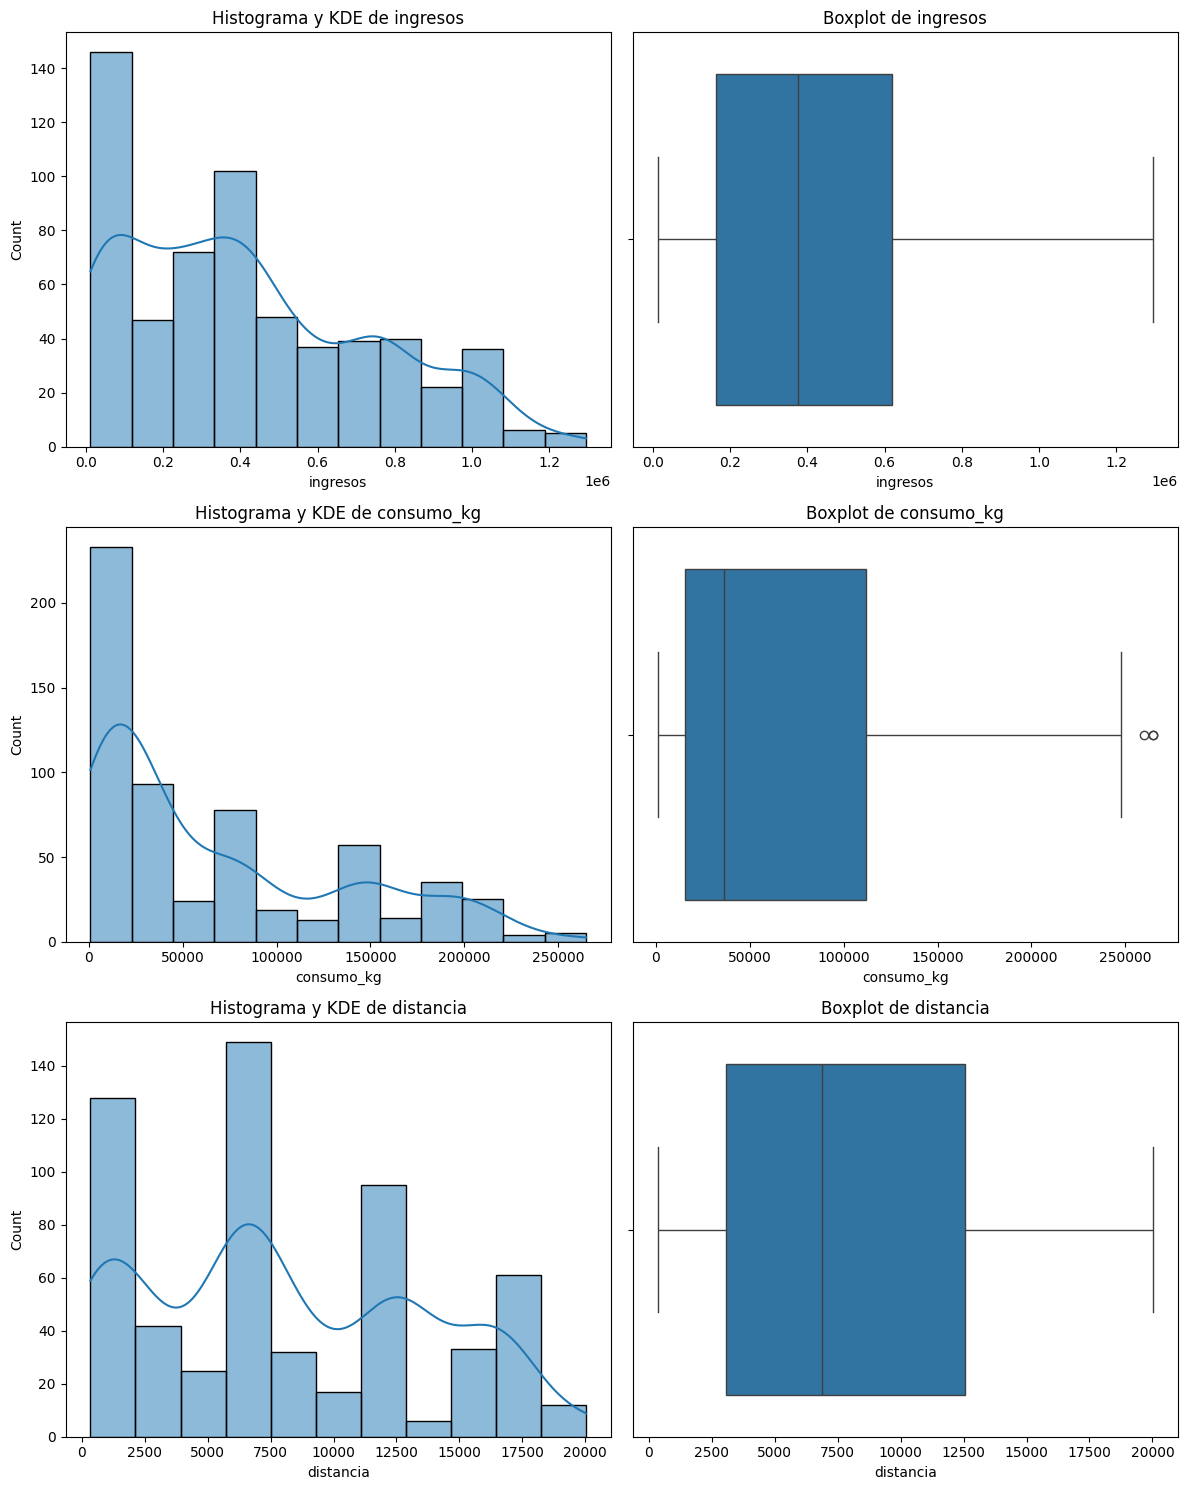

In [149]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","distancia"])

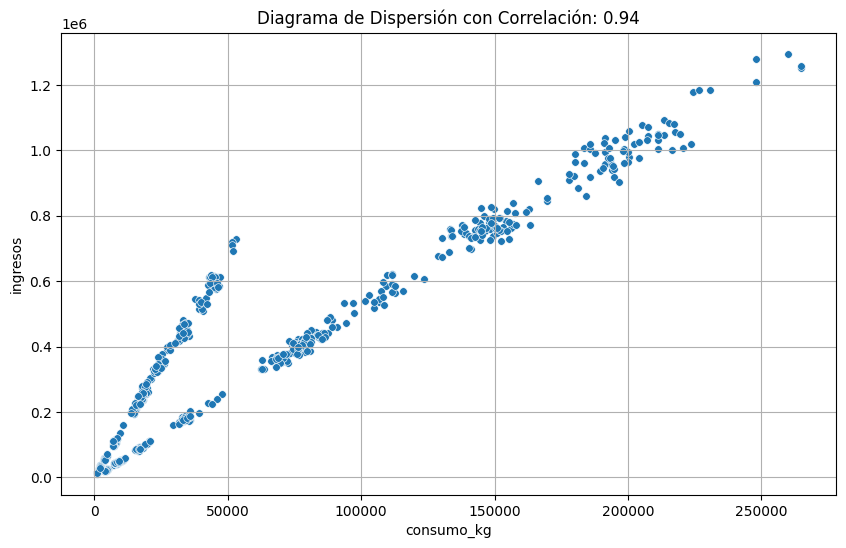

In [152]:
grafico_dispersion_con_correlacion(df_viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)


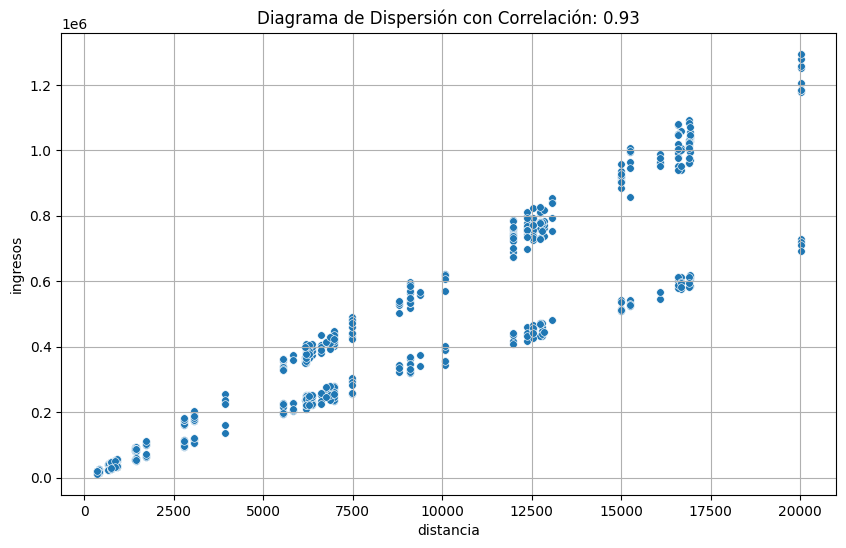

In [153]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

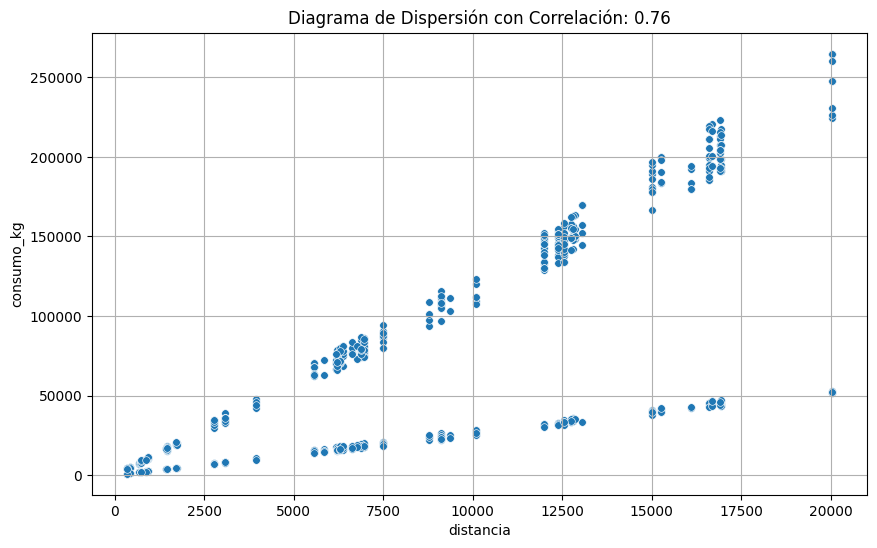

In [154]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

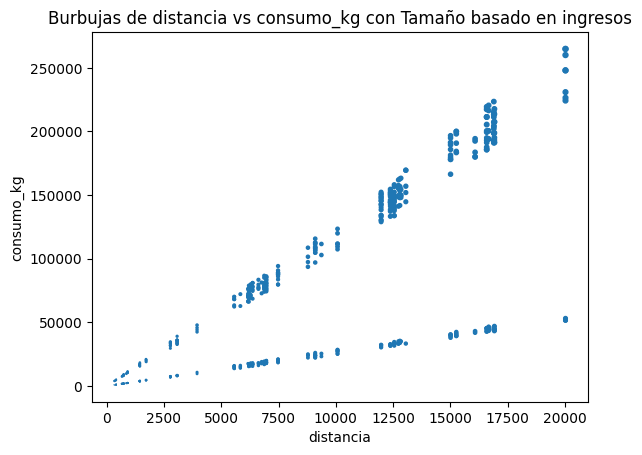

In [156]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [158]:

bins = [df_viajes["distancia"].min(), 1000, 3000, 7000, df_viajes["distancia"].max()]
labels = ["Corta", "Media", "Larga", "Muy Larga"]

df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins=bins, labels=labels, include_lowest=True)

df_viajes[["distancia", "cat_vuelo"]].head()

,distancia,cat_vuelo
0,411,Corta
1,12738,Muy Larga
2,9103,Muy Larga
3,6370,Larga
4,7480,Muy Larga


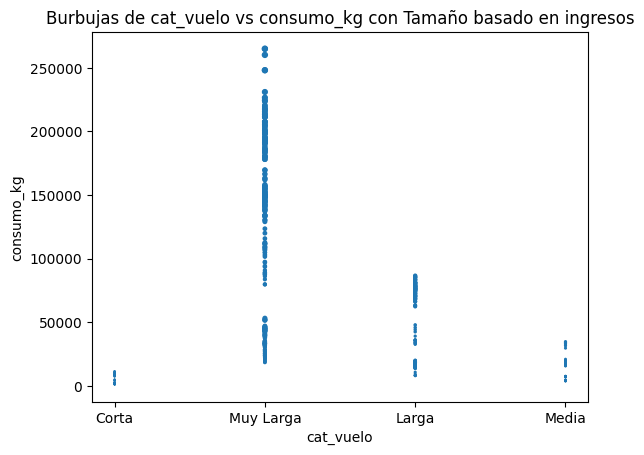

In [160]:
bubble_plot(df_viajes,"cat_vuelo","consumo_kg","ingresos", scale = 100000)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.